In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



In [3]:
# Load dataset
file = "play_tennis.csv"
df = pd.read_csv(file)

# Identify categorical columns (excluding 'play' initially)
categorical_columns = df.drop(columns=['play']).select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns only
encoders = {}
for col in categorical_columns:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

# Encode target column separately
target_encoder = LabelEncoder()
df['play'] = target_encoder.fit_transform(df['play'])

# Split data into features (X) and target (Y)
X = df.drop(columns=['play'])  # Features
Y = df['play']  # Target variable

In [5]:


# Split dataset into training & testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
model = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=42)
model.fit(X_train, Y_train)

# Check model accuracy
accuracy = model.score(X_test, Y_test)
print(f"Model Accuracy: {accuracy:.2f}")

print(f"Total Trees in the Random Forest: {len(model.estimators_)}")


Model Accuracy: 0.67
Total Trees in the Random Forest: 10


In [8]:
target_encoder.classes_.tolist()

['No', 'Yes']

In [9]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split


# Create two different Random Forest models
model_gini = RandomForestClassifier(n_estimators=5, criterion="gini", random_state=42)
model_entropy = RandomForestClassifier(n_estimators=5, criterion="entropy", random_state=42)

# Train models
model_gini.fit(X_train, Y_train)
model_entropy.fit(X_train, Y_train)

# Combine models using VotingClassifier (hard voting)
ensemble_model = VotingClassifier(estimators=[
    ('gini', model_gini),
    ('entropy', model_entropy)
], voting='hard')  # Change to 'soft' for probability-based voting

ensemble_model.fit(X_train, Y_train)

# Check accuracy
accuracy = ensemble_model.score(X_test, Y_test)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")


Ensemble Model Accuracy: 0.67


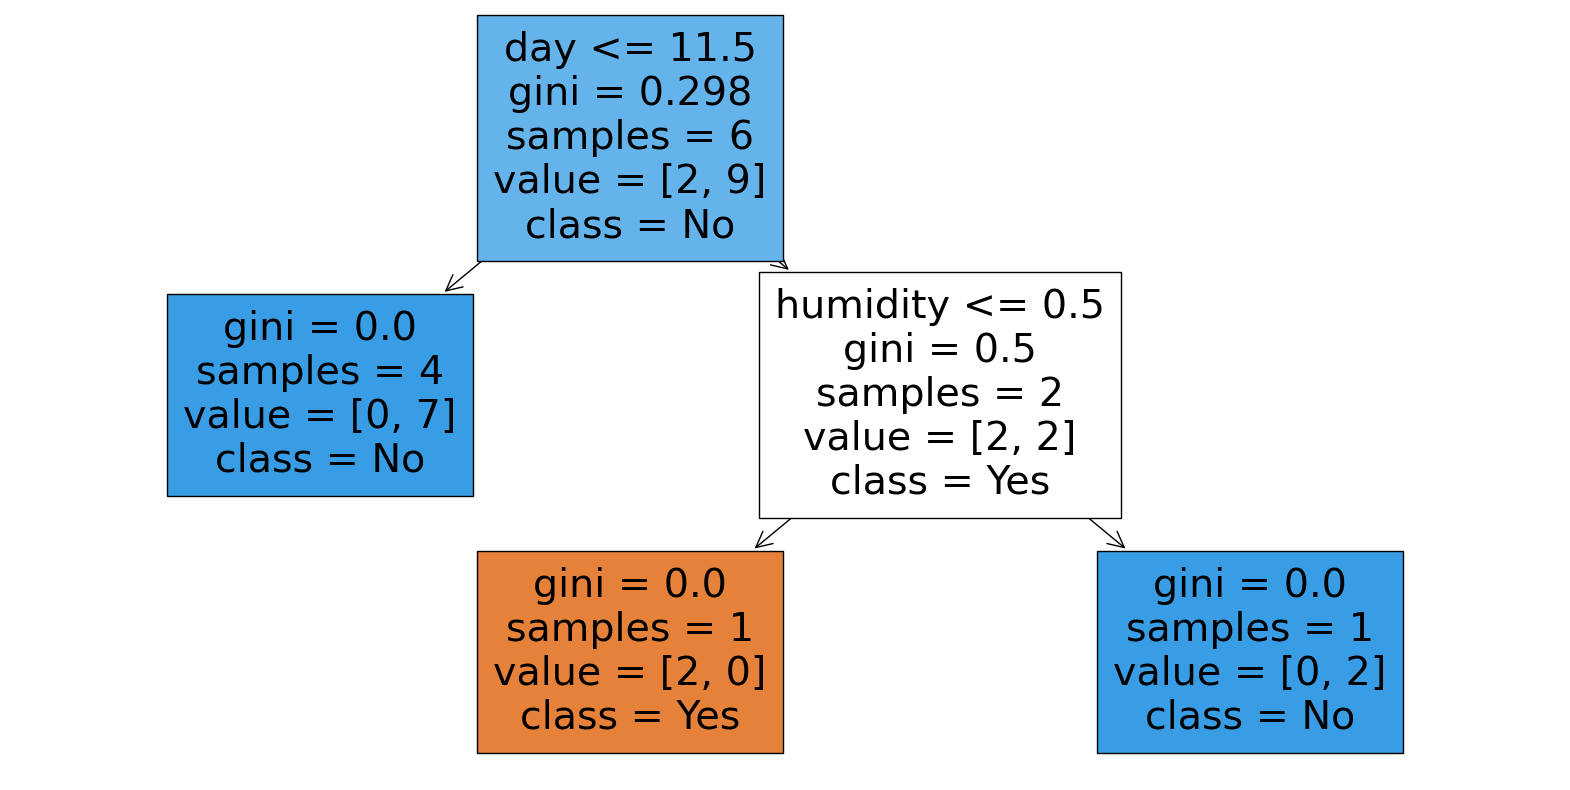

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract a single tree from one of the random forest models
tree_to_plot = model_gini.estimators_[0]  # Change index to visualize other trees

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, filled=True, feature_names=list(X.columns), class_names=["Yes", "No"])
plt.show()


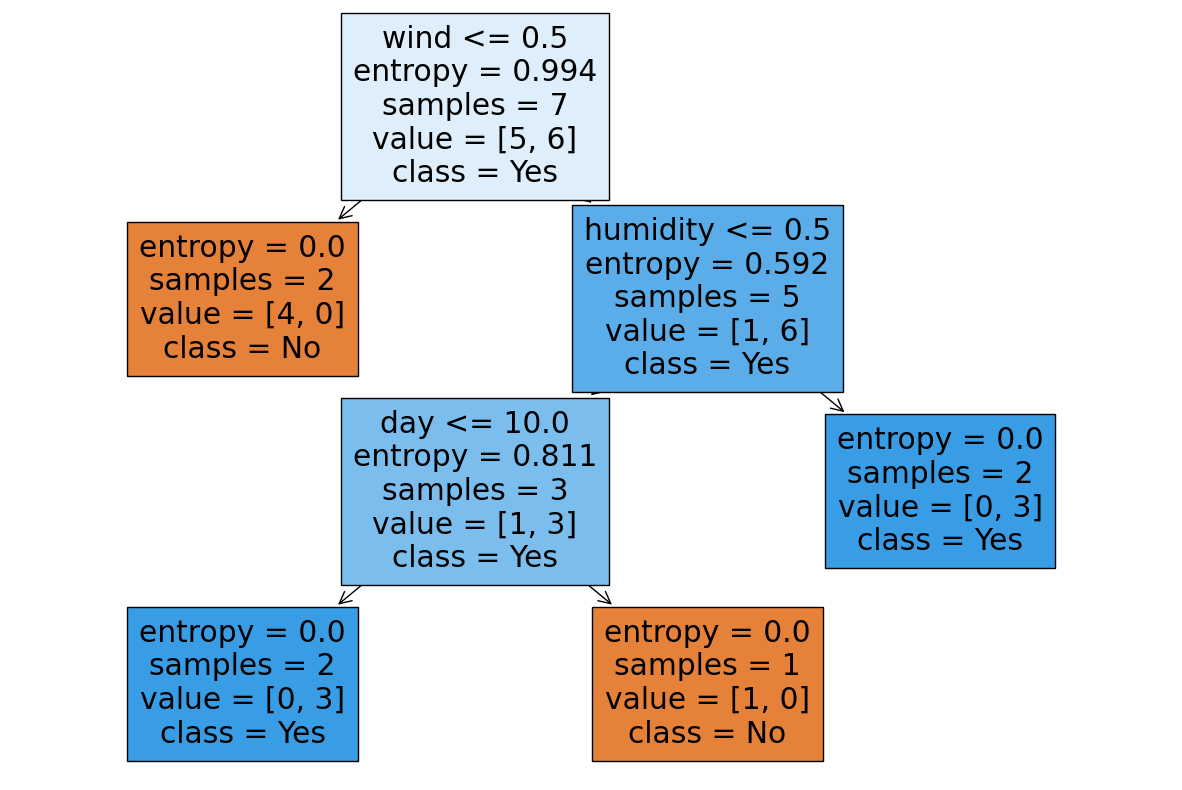

In [15]:

# Select a tree from the trained Random Forest and plot it
tree_index = 5  # Change this to visualize different trees
selected_tree = model.estimators_[tree_index]

# Convert feature names to a list
feature_names = X.columns.tolist()

# Plot the selected decision tree
plt.figure(figsize=(15, 10))
plot_tree(selected_tree, feature_names=feature_names, class_names=target_encoder.classes_.tolist(), filled=True)
plt.show()

In [16]:


# Predict on test set
Y_pred = model.predict(X_test)

# Convert predictions back to original labels
Y_pred_labels = target_encoder.inverse_transform(Y_pred)

# Show predictions alongside actual values
results = pd.DataFrame({
    'Actual': target_encoder.inverse_transform(Y_test),
    'Predicted': Y_pred_labels
})

print(results)


  Actual Predicted
0    Yes       Yes
1    Yes       Yes
2     No       Yes
